In [1]:
import numpy as np
import cv2
from sklearn.linear_model import Ridge

In [2]:
import matplotlib.pyplot as plt

def plot_frame(frame, title):
    plt.figure()
    plt.imshow(frame, cmap='gray')
    plt.title(title)
    # remove ticks
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [3]:
vid = cv2.VideoCapture('in/video_noisy.mp4')
frames = []
while vid.isOpened():
    ret, frame = vid.read()
    if ret:
        # Convert to grayscale and flatten
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame_gray.flatten())
    else:
        break
vid.release()
frames = np.array(frames).T
Y = frames
Y.shape

(102240, 120)

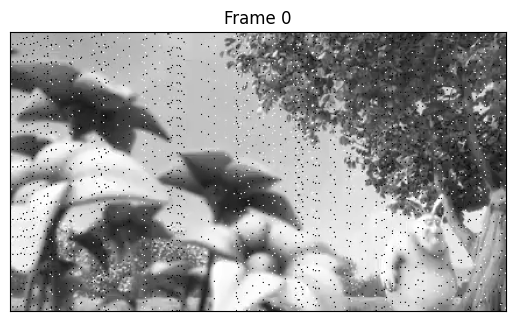

In [4]:
plot_frame(Y[:, 0].reshape(240, 426), 'Frame 0')

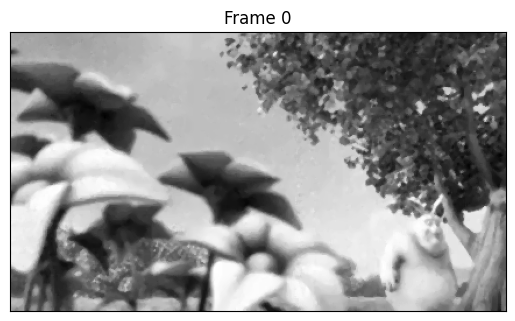

In [5]:
# X = Y with median filter each column
X = np.zeros(Y.shape)
for i in range(Y.shape[1]):
    X[:, i] = cv2.medianBlur(Y[:, i].reshape(240, 426).astype(np.uint8), 3).flatten()   
X.shape
plot_frame(X[:, 0].reshape(240, 426), 'Frame 0')

In [6]:
ridge_regressor = Ridge(alpha=0.1)
ridge_regressor.fit(X, Y)

Ridge(alpha=0.1)

In [7]:
B = ridge_regressor.coef_
B.shape

(120, 120)

In [8]:
Y_reconstructed = X @ B.T
print(Y_reconstructed.shape)
_, _, Vt = np.linalg.svd(B, full_matrices=False)
print(Vt.shape)

(102240, 120)
(120, 120)


In [9]:
Y_out = Y_reconstructed.T.reshape(-1, 240, 426)
frames_normalized = []
for i, frame in enumerate(Y_out):
    frame_normalized = cv2.normalize(frame, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    frames_normalized.append(frame_normalized)
# write video
out = cv2.VideoWriter('out/video_reconstructed_4.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (426, 240))
for frame in frames_normalized:
    out.write(cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR))
out.release()

In [10]:
rank = 10
Theta = Vt[:rank, :].T @ (Vt[:rank, :] @ B)
Theta.shape

(120, 120)

In [11]:
Yr = X @ Theta.T
Yr.shape

(102240, 120)

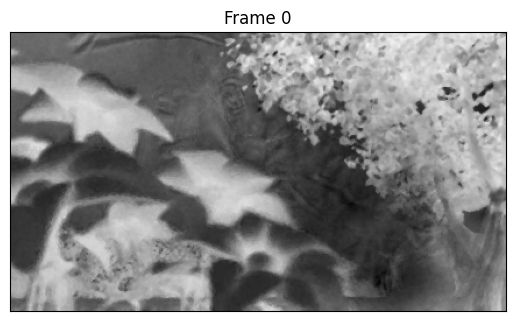

In [12]:
plot_frame(Yr[:, 103].reshape(240, 426), 'Frame 0')

In [13]:
Y_out = Yr.T.reshape(-1, 240, 426)
frames_normalized = []
for i, frame in enumerate(Y_out):
    frame_normalized = cv2.normalize(frame, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    frames_normalized.append(frame_normalized)
# write video
out = cv2.VideoWriter('out/video_reconstructed_3.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (426, 240))
for frame in frames_normalized:
    out.write(cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR))
out.release()